In [3]:
# importo libreria
import pandas as pd

In [5]:
# rendo path dinamico
path = "/Users/jesstex/Desktop/owid-covid-data.csv"

In [36]:
# leggo il csv
df = pd.read_csv(path)

In [24]:
# chiedo la dimensione del dataset
dimensions = df.shape
print('Dimensions of the dataset:', dimensions)

Dimensions of the dataset: (402809, 67)


In [38]:
# chiedo i metadati
metadata = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402809 entries, 0 to 402808
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402809 non-null  object 
 1   continent                                   383508 non-null  object 
 2   location                                    402809 non-null  object 
 3   date                                        402809 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [10]:
# Filtro le righe in cui la colonna "continente" è nulla
df = df[df['continent'].notna()]

# Group by 'continent' and sum the 'total_cases'
continent_cases = df.groupby('continent')['total_cases'].sum().reset_index()

# Display the result
print(continent_cases)

       continent   total_cases
0         Africa  1.360475e+10
1           Asia  2.289547e+11
2         Europe  2.172971e+11
3  North America  1.175176e+11
4        Oceania  1.044462e+10
5  South America  6.819703e+10


In [28]:
# Seleziono le colonne di interesse
df = df.loc[:, ['continent', 'location', 'total_cases_per_million']]

# Sostituire i valori nulli nella colonna 'continent' con 'Unknown'
df['continent'] = df['continent'].fillna('Unknown')

# Funzione descrittori
def calculate_statistics(continent_name):
    continent_data = df[df['continent'] == continent_name]
    max_value = continent_data['total_cases_per_million'].max()
    mean_value = continent_data['total_cases_per_million'].mean()
    total_cases_world = df['total_cases_per_million'].sum()
    total_cases_continent = continent_data['total_cases_per_million'].sum()
    percentage_world = (total_cases_continent / total_cases_world) * 100
    return max_value, mean_value, percentage_world

# Variabili per confrontare i continenti
continent1 = 'Africa'
continent2 = 'Europe'

# Calcolo i descrittori statistici per i due continenti
max_value1, mean_value1, percentage_world1 = calculate_statistics(continent1)
max_value2, mean_value2, percentage_world2 = calculate_statistics(continent2)

# Stampo risultati
print(f"Descrittori statistici per {continent1}:")
print(f"Valore massimo: {max_value1}")
print(f"Media: {mean_value1}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percentage_world1:.2f}%")

print(f"\nDescrittori statistici per {continent2}:")
print(f"Valore massimo: {max_value2}")
print(f"Media: {mean_value2}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percentage_world2:.2f}%")

Descrittori statistici per Africa:
Valore massimo: 507765.419
Media: 27076.66424286597
Percentuale rispetto ai casi totali nel mondo: 5.49%

Descrittori statistici per Europe:
Valore massimo: 771475.0
Media: 226525.4437442824
Percentuale rispetto ai casi totali nel mondo: 42.13%


In [40]:
import datetime

In [42]:
# trasformo colonna data da object a datetime
df['date']=pd.to_datetime(df['date'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402809 entries, 0 to 402808
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    402809 non-null  object        
 1   continent                                   383508 non-null  object        
 2   location                                    402809 non-null  object        
 3   date                                        402809 non-null  datetime64[ns]
 4   total_cases                                 363712 non-null  float64       
 5   new_cases                                   391526 non-null  float64       
 6   new_cases_smoothed                          390296 non-null  float64       
 7   total_deaths                                341117 non-null  float64       
 8   new_deaths                                  391897 non-null  float64      

In [46]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [48]:
# aggiungo colonna di anno andando a estrapolare poi 2022
df["year"]=df['date'].dt.year
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402804,ZWE,Africa,Zimbabwe,2024-05-15,266362.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
402805,ZWE,Africa,Zimbabwe,2024-05-16,266362.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
402806,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
402807,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024


In [50]:
import matplotlib.pyplot as plt

In [51]:
# Filtra i dati relativi all'Italia nel 2022
italy_data_2022 = df[(df['location'] == 'Italy') & (df['year'] == 2022)]
print(italy_data_2022)

       iso_code continent location       date  total_cases  new_cases  \
173121      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
173122      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
173123      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
173124      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
173125      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
173481      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
173482      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
173483      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
173484      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
173485      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173121           36797.000      136530.0      

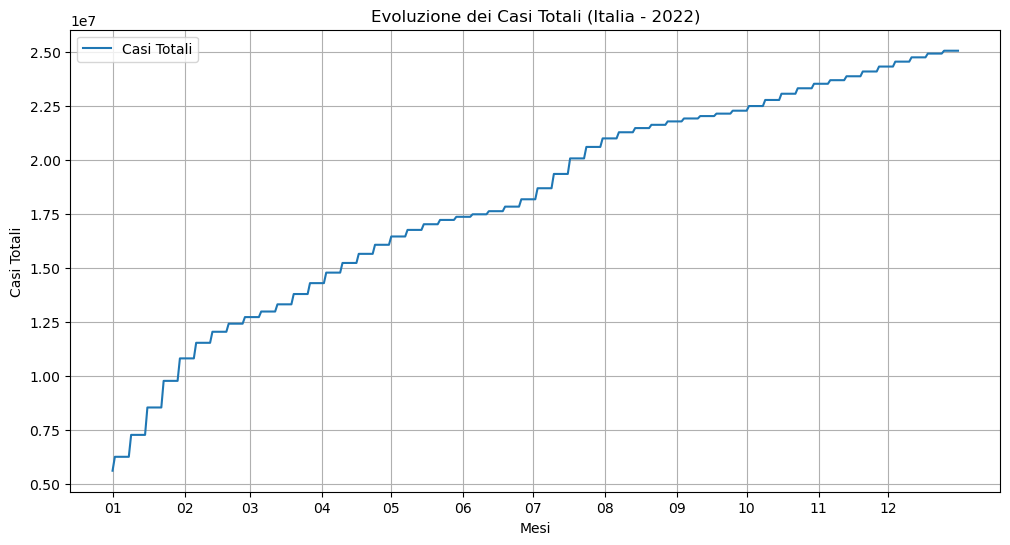

In [54]:
# Imposta i tick dell'asse X ai primi giorni di ogni mese
months = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

# Grafico dell'evoluzione dei casi totali rispetto alla data per mese del 2022
plt.figure(figsize=(12, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['total_cases'], label='Casi Totali')
plt.xlabel('Mesi')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali (Italia - 2022)')
plt.xticks(months, labels=[month.strftime('%m') for month in months], rotation=0)
plt.legend()
plt.grid(True)
plt.show()

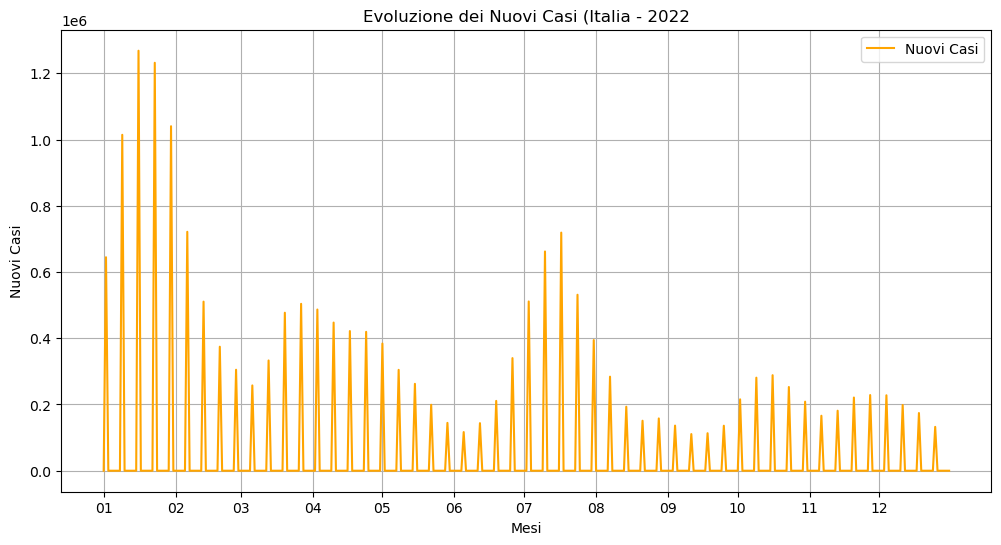

In [56]:
# Imposta i tick dell'asse X ai primi giorni di ogni mese
months = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

# Grafico del numero di nuovi casi rispetto alla data
plt.figure(figsize=(12, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Mesi')
plt.ylabel('Nuovi Casi')
plt.title('Evoluzione dei Nuovi Casi (Italia - 2022')
plt.xticks(months, labels=[month.strftime('%m') for month in months], rotation=0)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/s3/dlnlzh155n37_9fpqphxsxbc0000gn/T/ipykernel_5344/210991633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data_2022.loc[:, 'cumulative_new_cases'] = italy_data_2022['new_cases'].cumsum()


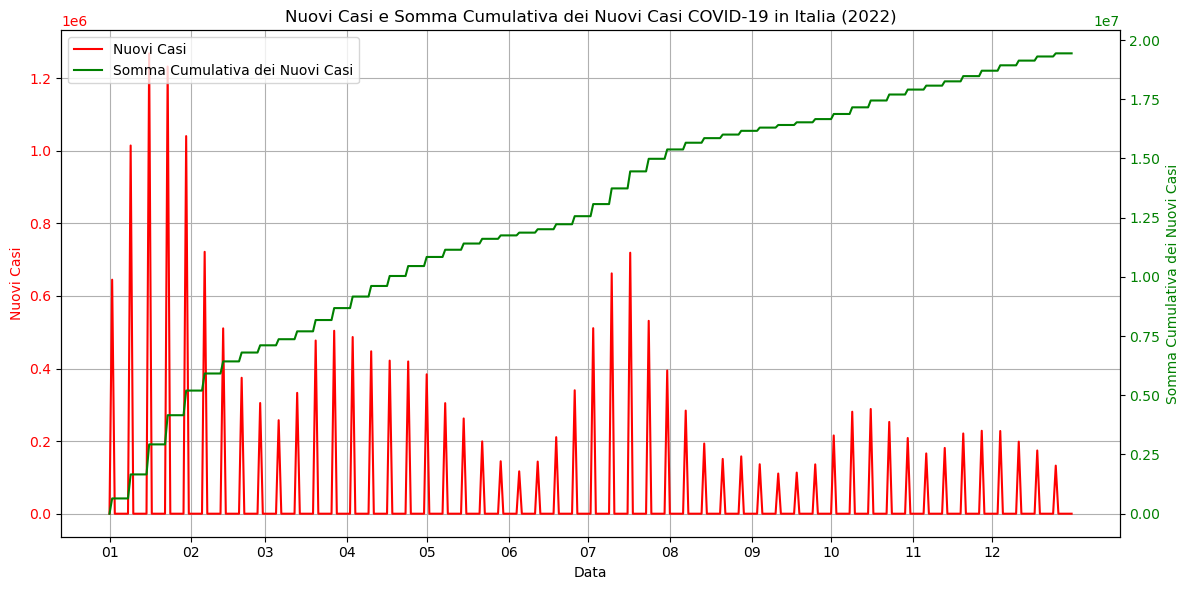

In [58]:
# Calcolare la somma cumulativa dei nuovi casi
italy_data_2022.loc[:, 'cumulative_new_cases'] = italy_data_2022['new_cases'].cumsum()

# Imposta i tick dell'asse X ai primi giorni di ogni mese
months = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

# Creare un unico grafico con due assi y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico dei nuovi casi giornalieri
line1, = ax1.plot(italy_data_2022['date'], italy_data_2022['new_cases'], label='Nuovi Casi', color='red')
ax1.set_xlabel('Data')
ax1.set_ylabel('Nuovi Casi', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Impostare i tick dell'asse X
ax1.set_xticks(months)
ax1.set_xticklabels([month.strftime('%m') for month in months])

# Grafico della somma cumulativa dei nuovi casi
ax2 = ax1.twinx()
line2, = ax2.plot(italy_data_2022['date'], italy_data_2022['cumulative_new_cases'], label='Somma Cumulativa dei Nuovi Casi', color='green')
ax2.set_ylabel('Somma Cumulativa dei Nuovi Casi', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titolo e griglia
plt.title('Nuovi Casi e Somma Cumulativa dei Nuovi Casi COVID-19 in Italia (2022)')
ax1.grid(True)

# Aggiungere la legenda
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()

# L'andamento della somma cumulativa dei nuovi casi mostra una crescita costante durante l'anno.

<Figure size 1000x600 with 0 Axes>

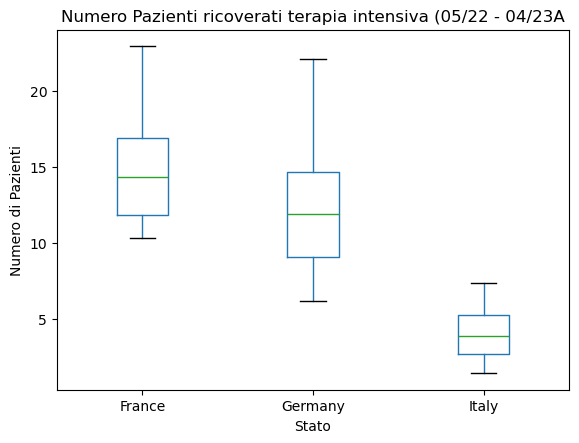

" Analizzando, attraverso un box plot, a distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia,\ndal maggio 2022 ad aprile 2023 emerge che:se la Germania presente una mediana e un IQR più alti rispetto a Italia e Francia.\nPer cui la Germania ha avuto un numero più elevato e più variabile di pazienti in terapia intensiva durante il periodo specificato. \nL'Italia, ivece, ha una scatola più piccola con pochi outliers, mostrando una situazione più stabile"

In [64]:
# Filtrare i dati per le nazioni di interesse e il periodo specificato
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'

df_filtered = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Selezionare le colonne rilevanti
df_filtered = df_filtered[['location', 'date', 'icu_patients_per_million']]

# Creare il boxplot
plt.figure(figsize=(10, 6))
df_filtered.boxplot(by='location', column=['icu_patients_per_million'], grid=False)
plt.title('Numero Pazienti ricoverati terapia intensiva (05/22 - 04/23A')
plt.suptitle('')
plt.xlabel('Stato')
plt.ylabel('Numero di Pazienti')
plt.show()

''' Analizzando, attraverso un box plot, a distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia,
dal maggio 2022 ad aprile 2023 emerge che:se la Germania presente una mediana e un IQR più alti rispetto a Italia e Francia.
Per cui la Germania ha avuto un numero più elevato e più variabile di pazienti in terapia intensiva durante il periodo specificato. 
L'Italia, ivece, ha una scatola più piccola con pochi outliers, mostrando una situazione più stabile''' 

In [66]:
# Filtrare i dati per le nazioni di interesse e l'anno 2023
countries = ['Italy', 'Germany', 'France', 'Spain']

df_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Selezionare le colonne rilevanti
df_2023 = df_2023[['location', 'date', 'hosp_patients_per_million']]

# Commento: sono presenti dei valori nulli per questo conviene sostituirli magari con la media dei casi per ridurne l'impatto.

# Gestire i valori nulli
# Verifica quanti valori nulli ci sono per ciascun paese
null_counts = df_2023.groupby('location')['hosp_patients_per_million'].apply(lambda x: x.isnull().sum())
print("Numero di valori nulli per ciascun paese nel 2023:")
print(null_counts)

# Calcolare la media dei pazienti ospitalizzati per ciascun paese
mean_hosp_patients = df_2023.groupby('location')['hosp_patients_per_million'].mean()

# Sostituire i valori nulli con il valore medio dei pazienti ospitalizzati per ciascun paese
for country in countries:
    mean_value = mean_hosp_patients[country]
    df_2023.loc[df_2023['location'] == country, 'hosp_patients_per_million'] = df_2023.loc[df_2023['location'] == country, 'hosp_patients_per_million'].fillna(mean_value)

# Verifica quanti valori nulli ci sono dopo la sostituzione
null_counts_after = df_2023.groupby('location')['hosp_patients_per_million'].apply(lambda x: x.isnull().sum())
print("Numero di valori nulli per ciascun paese nel 2023 dopo la sostituzione:")
print(null_counts_after)

# Calcolare la somma dei pazienti ospitalizzati per ciascun paese
total_hosp_patients = df_2023.groupby('location')['hosp_patients_per_million'].sum()
print("\nSomma dei pazienti ospitalizzati nel 2023 per ciascun paese:")
print(total_hosp_patients)

Numero di valori nulli per ciascun paese nel 2023:
location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients_per_million, dtype: int64
Numero di valori nulli per ciascun paese nel 2023 dopo la sostituzione:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients_per_million, dtype: int64

Somma dei pazienti ospitalizzati nel 2023 per ciascun paese:
location
France     82684.828889
Germany        0.000000
Italy      19907.221000
Spain      16799.264691
Name: hosp_patients_per_million, dtype: float64
